# __Plot values from data folder__

In [132]:
import numpy as np
import matplotlib.pyplot as plt

## __Dense tests__

In [133]:
def getMeansAndVars(filenames):
    keys = []
    for a in ["local", "global"]:
        for b in ["noise", "noiseless"]:
            for c in ["dynamic", "static"]:
                for d in ["trc", "error"]:
                    keys += [f"{a}_{b}_{c}_{d}"]

    means = {}
    vars = {}

    for key in keys:
        data_total = np.array([])
        for filename in filenames:
            data_total = np.load(filename)[key] if data_total.size == 0 else  np.vstack((data_total, np.load(filename)[key]))
        means[key] = np.mean(data_total, axis=0)
        vars[key] = np.var(data_total, axis=0)
    
    return means, vars

In [134]:
def barPlot(cs, mean1, var1, str1, label1, mean2, var2, str2, label2, xlabel, ylabel, amp=1):
    width = 0.2
    xlabel = [f"c={c}" for c in cs]
    name_len = np.arange(len(xlabel))
    plt.bar(name_len-width, mean1[str1], yerr=var1[str1]*amp, width=width*2, capsize=3, label=label1)
    plt.bar(name_len+width, mean2[str2], yerr=var2[str2]*amp, width=width*2, capsize=3, label=label2)
    plt.xticks(name_len, xlabel, ha='right')

    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

In [135]:
# Dense load
dense_filenames = [f"data/result_dense_test_1.npz", f"data/result_dense_test_2.npz"]
dense_means, dense_vars = getMeansAndVars(dense_filenames)

# Poisson load
poisson_filenames = [f"data/result_poisson_test_1.npz"]
poisson_means, poisson_vars = getMeansAndVars(poisson_filenames)

cs = [1.04e+00, 1.49e+00, 1.58e+02]

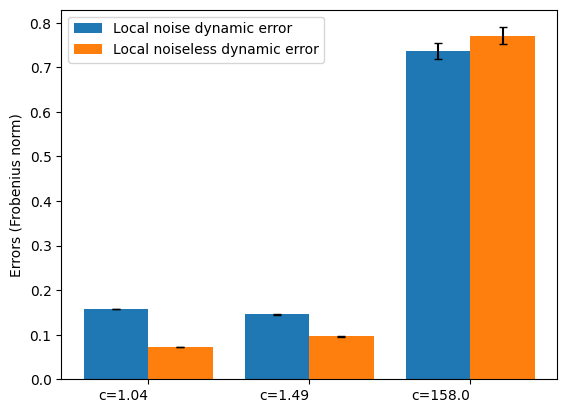

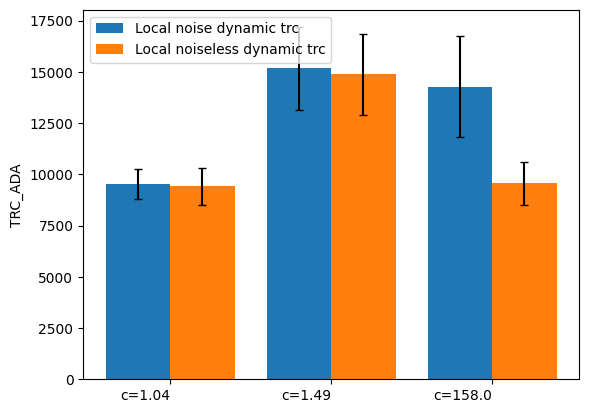

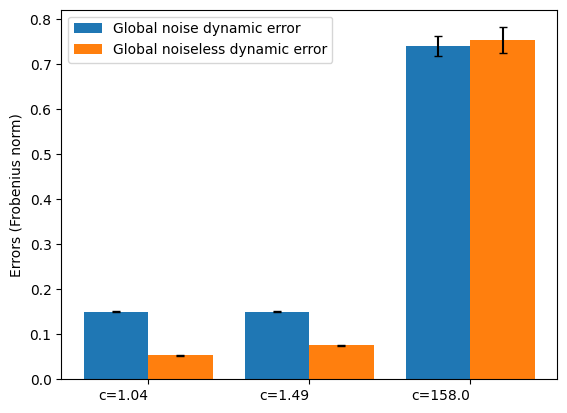

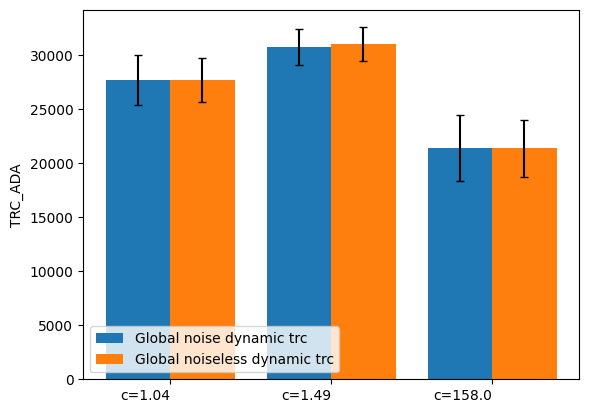

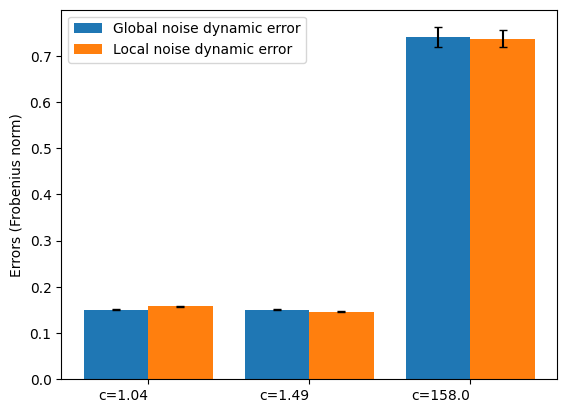

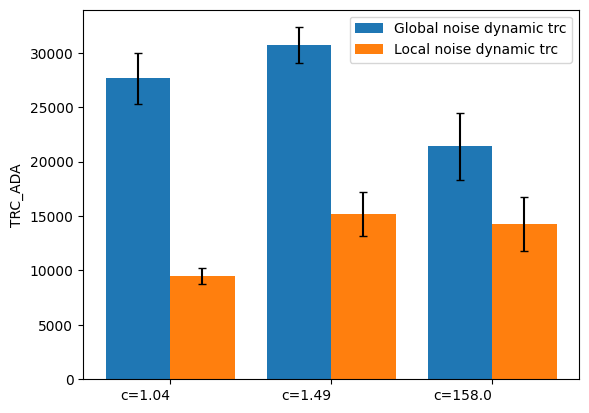

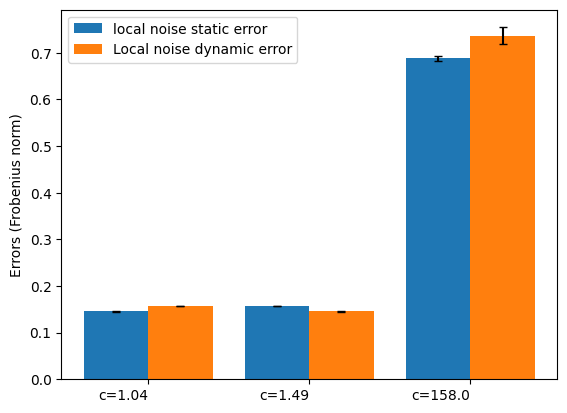

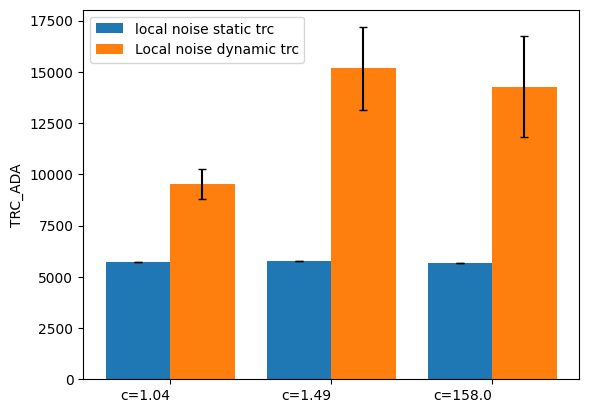

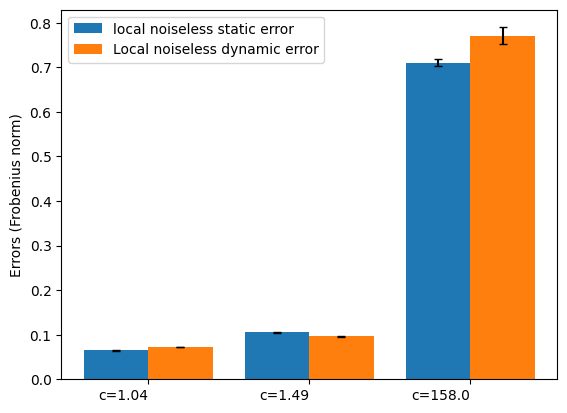

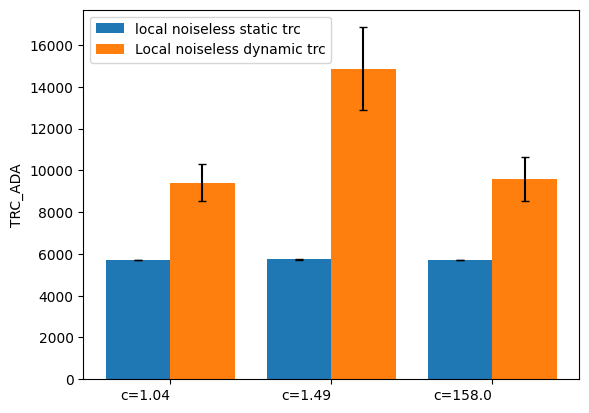

In [137]:
# noise vs noiseless dynamic (local)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_dynamic_error", str2="local_noiseless_dynamic_error",
        label1="Local noise dynamic error", label2="Local noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_dynamic_trc", str2="local_noiseless_dynamic_trc",
        label1="Local noise dynamic trc", label2="Local noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5)

# noise vs noiseless dynamic (global)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_error", str2="global_noiseless_dynamic_error",
        label1="Global noise dynamic error", label2="Global noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_trc", str2="global_noiseless_dynamic_trc",
        label1="Global noise dynamic trc", label2="Global noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5)

# global vs local (noise dynamic)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_error", str2="local_noise_dynamic_error",
        label1="Global noise dynamic error", label2="Local noise dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="global_noise_dynamic_trc", str2="local_noise_dynamic_trc",
        label1="Global noise dynamic trc", label2="Local noise dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 

# static vs dynamic (local noise)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_static_error", str2="local_noise_dynamic_error",
        label1="local noise static error", label2="Local noise dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noise_static_trc", str2="local_noise_dynamic_trc",
        label1="local noise static trc", label2="Local noise dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 

# static vs dynamic (local noiseless)
barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noiseless_static_error", str2="local_noiseless_dynamic_error",
        label1="local noiseless static error", label2="Local noiseless dynamic error",
        xlabel="Condition numbers", ylabel = "Errors (Frobenius norm)")

barPlot(cs, 
        mean1=dense_means, mean2=dense_means,
        var1=dense_vars, var2=dense_vars,
        str1="local_noiseless_static_trc", str2="local_noiseless_dynamic_trc",
        label1="local noiseless static trc", label2="Local noiseless dynamic trc",
        xlabel="Condition numbers", ylabel = "TRC_ADA", 
        amp=1e-5) 